## Importing Libraries

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

## Open CSV

In [2]:
h_book = pd.read_csv('hotel_bookings_clean.csv')
h_book.head()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_No_Deposit,deposit_type_Non_Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,27,1,7,0,0,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,737,27,1,7,0,0,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,7,27,1,7,0,1,1,0.0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,13,27,1,7,0,1,1,0.0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,14,27,1,7,0,2,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0


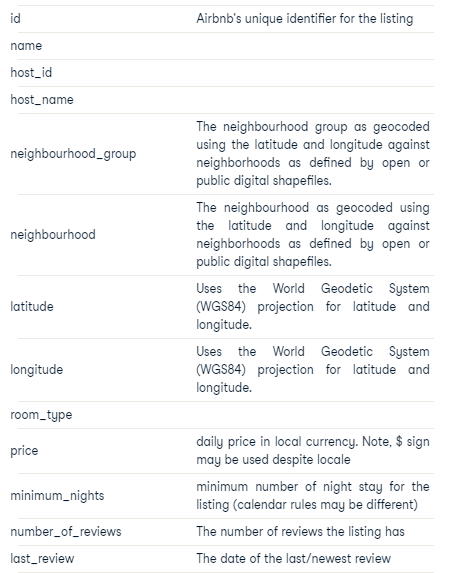

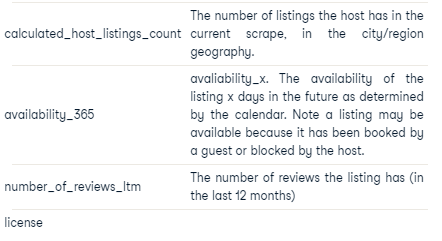

In [3]:
h_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119210 entries, 0 to 119209
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119210 non-null  int64  
 1   lead_time                       119210 non-null  int64  
 2   arrival_date_week_number        119210 non-null  int64  
 3   arrival_date_day_of_month       119210 non-null  int64  
 4   arrival_date_month              119210 non-null  int64  
 5   stays_in_weekend_nights         119210 non-null  int64  
 6   stays_in_week_nights            119210 non-null  int64  
 7   adults                          119210 non-null  int64  
 8   children                        119206 non-null  float64
 9   babies                          119210 non-null  int64  
 10  is_repeated_guest               119210 non-null  int64  
 11  previous_cancellations          119210 non-null  int64  
 12  previous_booking

Every column is numeric (Float or Int) so we will not act in the columns to change/remove because of the type that they may have.

In [4]:
h_book.isna().sum()

is_canceled                       0
lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
arrival_date_month                0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
required_car_parking_spaces       0
total_of_special_requests         0
avg_daily_rate                    0
booked_by_company                 0
booked_by_agent                   0
hotel_City                        0
hotel_Resort                      0
meal_BB                           0
meal_FB                           0
meal_HB                           0
meal_No_meal                      0
market_segment_Aviation           0
market_segment_Complementary      0
market_segment_Corporate          0
market_segment_Direct       

The column 'children' has 4 null values we will drop this column.

In [5]:
h_book.dropna(inplace = True)

In [79]:
h_book.shape

(119206, 53)

## Objective - Predict if the client will or not cancel is reservation in this hotel

A chain of hotels has just hired you as a data analyst. They have noticed that the cancellation rate has risen in the past few years. This often leads to rooms that are left unrented for multiple days at a time.

Hotel management is interested in developing a model to predict the likelihood that a customer will cancel their reservation. If successful, this could be used to optimize their booking service and anticipate when cancellations will occur.

You will need to prepare a report that is accessible to a broad audience. It should outline your motivation, steps, findings, and conclusions.

Is the dataset balanced or unbalaced? Check the labels of the column 'is_cancelled'.

If we find that the data set is below 30% for one of tho categories, we will categorize it as unbalace.

In [6]:
h_book['is_canceled'].value_counts(normalize = True)

0    0.629255
1    0.370745
Name: is_canceled, dtype: float64

Category number 1 has lower number of data points however is 37%, we will consider as mild and we will consider that the dataset is balanced.

Why we should check if the dataset is unbalanced? An unbalanced dataset, with lower data points belonging to one of te categories will not be able to learn fully this category and the model will be unnacurate.

If we check a strong discrepancy between categories we should apply downsampling and upweighting.

Divide the data into X & y to start the split between Train & Test.

In [88]:
X = h_book.drop('is_canceled', axis = 'columns').values
y = h_book['is_canceled'].values

## Dimension Reduction with PCA - Intrinsic Value

Our dataset has 52 features, meaning that implement a model with 83_444 x 52 is time and memory consuming.

So we will try to reduce the number of features present, 'removing' the features with low variance (low information). Staying only with the features that have more information, getting the model computionally & time friendly.

Selecting number of components____

We have two ways of doing it

- 1. Explained Variance
- 2. Explained Variance Ratio

- Explained Variance

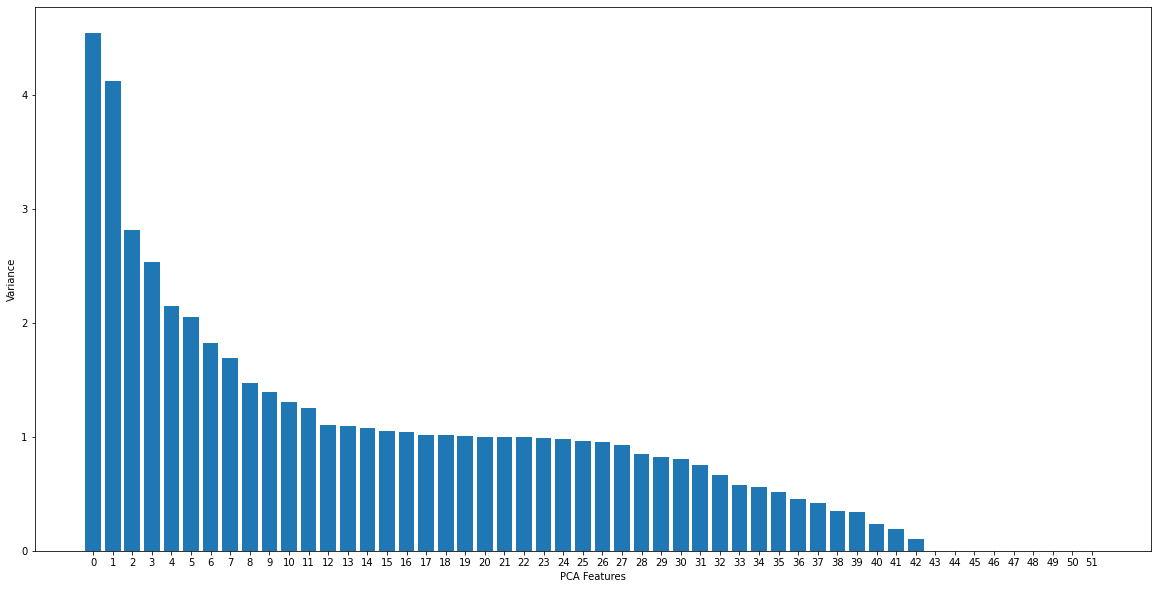

In [83]:
# Create scaler: scaler
scaler = StandardScaler()

#Create a PCA instance (Note: We will not define n_components as default, meaning that for now we will consider them all)
pca = PCA()

#PCA fit
pipeline = make_pipeline(scaler, pca)

#Fit the pipeline to X.values
pipeline.fit(X)
        
#Plot the explained variance
fig, ax = plt.subplots(figsize=(20,10))
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA Features')
plt.ylabel('Variance')
plt.xticks(features)
plt.show()

This method is useful to check the variation of variances for each feature in the dataset, however, in this case, is not accurate enough for us to do a precise and based decision.

So we will use explained variance ratio.

When using explained variance ratio, we shoul use a treshold of the explained variance that we want to include in our model. Literature refers that we should use something between 0.90 to 0.99, as we have too many features and we want to balance variance with the number of features used in this case we will go with 0.99.

- Explained Variance Ratio

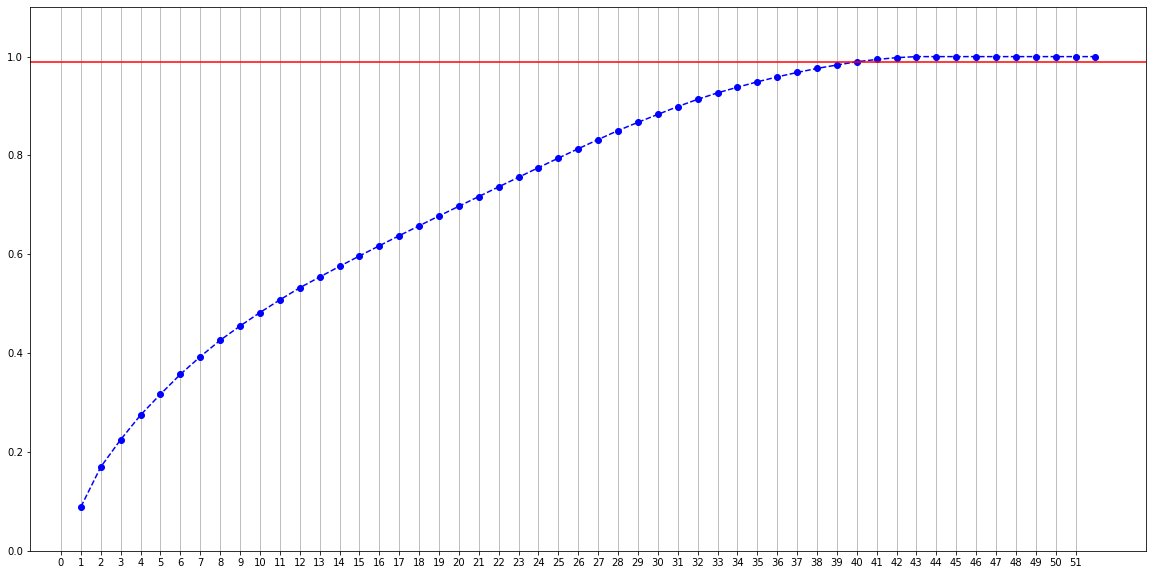

In [84]:
#Start plotting
fig, ax = plt.subplots(figsize=(20,10))
#Define x as the number of features, in our case 52
x = np.arange(1, 53, step=1)
#Define y as the cumulative sum of the features over our dataset
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(x, y, marker='o', linestyle='--', color='b')
# Define a line with the threshold that you choose in our case it was 0.90
plt.axhline(y=0.99, color='r', linestyle='-')
plt.xticks(np.arange(0, 52, step=1))
ax.grid(axis='x')

In this case I will not remove any features, maybe we could remove 12 features but I really feel that they are close enough from each other and we will keep it as it has. However, we could remove from the 41 to the end.

Let's now start our PCA Reduction with the all features.

In [86]:
# Import PCA
from sklearn.decomposition import PCA

#Scale the data
scaler = StandardScaler()

#Fit and Transform X
scaled_samples = scaler.fit_transform(X)

# Create a PCA model with 2 components: pca
pca = PCA(n_components = 52)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)

(119206, 52)


## Evaluation of different Models

In [89]:
#We will choose the solver Newton-cg instead of the default 'lbfgs' because we will have a lot of features,
#and lgbfs usually is not able to converge this type of datasets
models = {'Logistic Regression':LogisticRegression(solver = 'newton-cg'), 'KNN':KNeighborsClassifier(), 
          'Decision Tree Classifier': DecisionTreeClassifier()}
results = []

#Split the data
X_train, X_test, y_train, y_test = train_test_split(scaled_samples,y,test_size = 0.3, random_state = 1)

for model in models.values():
    
    #Start KFOLD, remember that you should SHUFFLE
    kf = KFold(n_splits = 6, random_state = 2, shuffle =True)
    
    #Start Cross Val Score
    cv = cross_val_score(model, X_train, y_train, cv = kf)
    
    #Append the results
    results.append(cv)
   
print(f"Logistic Regression has a {np.round(np.mean(results[0]),4)} accuracy with a standard deviation of {np.round(np.std(results[0]),4)}")

print(f"KNN has a {np.round(np.mean(results[1]),4)} accuracy with a standard deviation of {np.round(np.std(results[1]),4)}")

print(f"Decision Tree Classifier has a {np.round(np.mean(results[2]),4)} accuracy with a standard deviation of {np.round(np.std(results[2]),4)}")

Logistic Regression has a 0.8073 accuracy with a standard deviation of 0.0026
KNN has a 0.809 accuracy with a standard deviation of 0.0033
Decision Tree Classifier has a 0.8093 accuracy with a standard deviation of 0.002


We have very similar accuracy for the three different models considered.

So we will keep the best one, Decision Tree Classifier.

## Decision Tree Classifier

## Tuning CART Parameters

We will tune the parameter to enable us to find the best fit for our CART Model.

Let's see what params can we test in our Model.

In [90]:
#Initiate the model
dt = DecisionTreeClassifier()

#Use get_params() to have a list of different features to consider in our analysis
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

We will only test max_depth and min_samples_leaf,

- Max_depth - The size of our tree.

- Min_Samples_leaf - Minimum samples of the last node.

In [91]:
Xa = h_book.drop('is_canceled', axis = 'columns').values
ya = h_book['is_canceled'].values

#Dividing the dataset into train and tes
X_train, X_test, y_train, y_test = train_test_split(Xa, ya, test_size = 0.3, random_state = 42)

#Scaling the data
scaler = StandardScaler()

#Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

We will use GridSearchCV to make a grid and iterate over the options that we will feed for the params used.

In [92]:
#Define the params that we want to test
params_dt = {'max_depth': np.arange(2,10,1),
            'min_samples_leaf':np.arange(0.12,0.20,0.01)}

#Initiate the model
dt = DecisionTreeClassifier(random_state = 1)

#Initiate grid_dt(Note we will use accuracy because we consider above that our data is not unbalanced, if it is unbalanced use Roc_Auc to 
#check the accuracy instead the accuracy itself)
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='accuracy',
                       cv=5,
                       verbose=1,
                       n_jobs=-1)

#Fit the model to the gridsearch
grid_dt.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ])},
             scoring='accuracy', verbose=1)

In [93]:
#Extract the best estimator
best_model = grid_dt.best_estimator_

#Predict the probabilities
y_pred = best_model.predict(X_test)

## Compute test_roc_auc
accuracy = accuracy_score(y_test,y_pred)

# Print test_roc_auc
print('Test set Accuracy score: {:.3f}'.format(accuracy))

Test set Accuracy score: 0.625


In [94]:
print(f'The best parameter for max depth is {grid_dt.best_estimator_.get_params()["max_depth"]}')
print(f'The best parameter for min_samples_leaf is {grid_dt.best_estimator_.get_params()["min_samples_leaf"]}')

The best parameter for max depth is 4
The best parameter for min_samples_leaf is 0.12


We achieve a score of 63% of accuracy, at the first look is not that high. However if we consider the number of features that we are working with is not that bad and we will accept it.

With a max_depth of 4 and min_samples leaf of 0.12.

Now we will get the more importants features used for this analysis

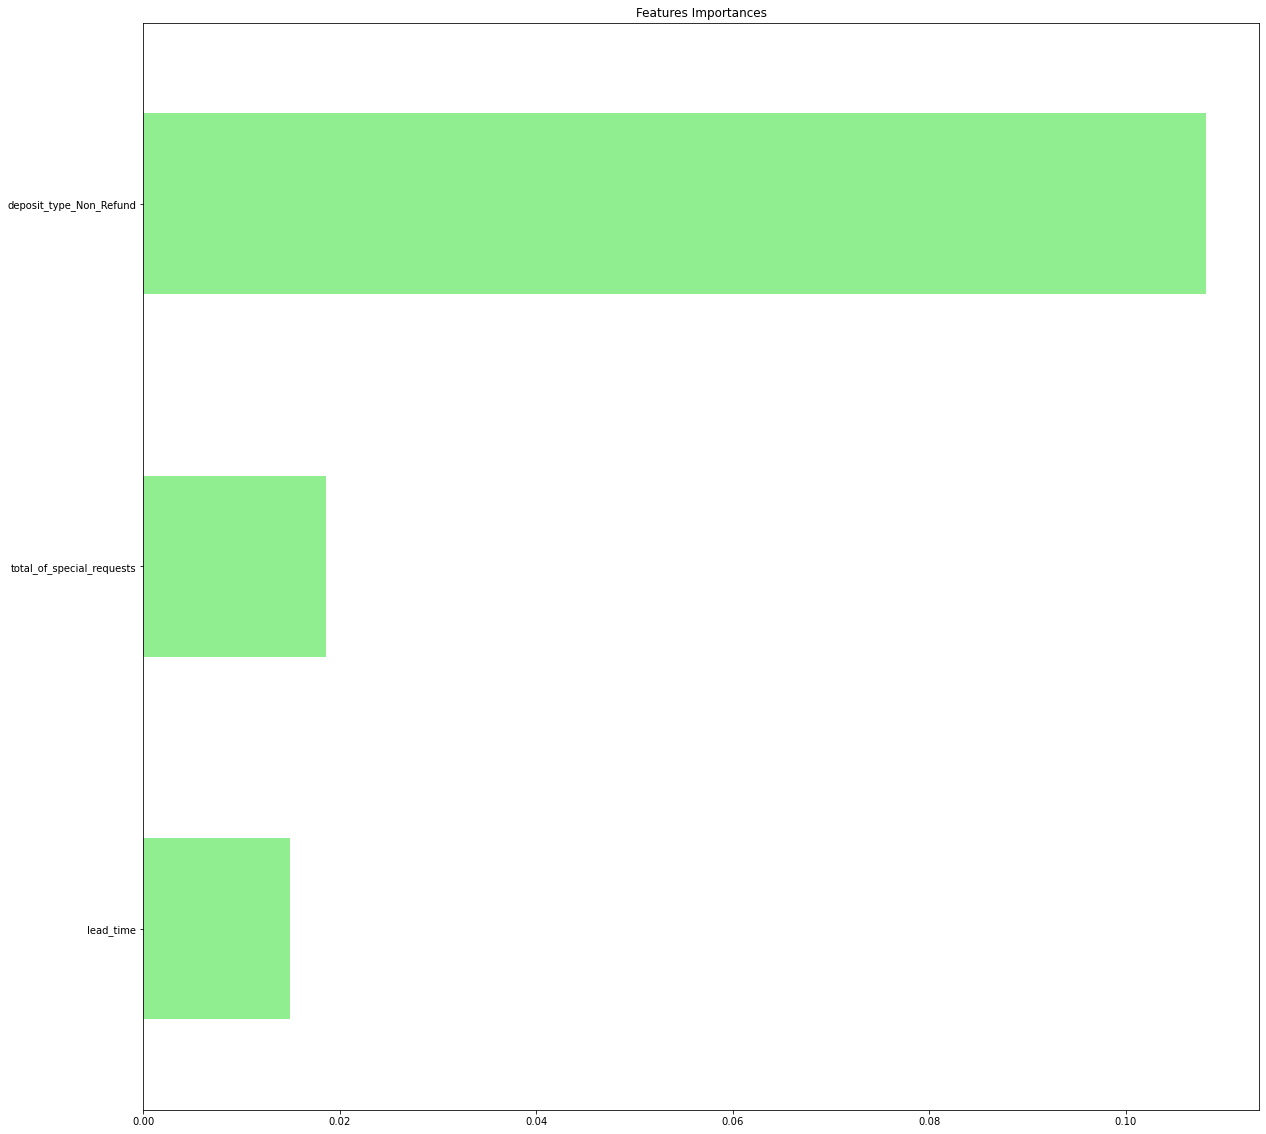

In [123]:
t = h_book.drop('is_canceled', axis = 'columns')

# Create a pd.Series of features importances
importances = pd.Series(data=best_model.tree_.compute_feature_importances(normalize=False),
                        index= h_book.drop('is_canceled', axis = 'columns').columns)

# Sort importances
importances_sorted = importances.sort_values()

importances_sorted_top = importances_sorted[-3:]

fig, ax = plt.subplots(figsize = (20,20))

# Draw a horizontal barplot of importances_sorted
importances_sorted_top.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

We check that the features more important to understand if a client will cancel their booking in this hotel are,

- Non Refund option
- Special Requests
- Waitng time for the room

## Conclusion

First we will check the mean for every single important feature.

In [122]:
h_book.groupby('is_canceled')[['lead_time','market_segment_Online_TA','deposit_type_Non_Refund','total_of_special_requests']].mean()

,lead_time,market_segment_Online_TA,deposit_type_Non_Refund,total_of_special_requests
is_canceled,,,,
0,80.082028,0.475570,0.001240,0.714455
1,144.899106,0.469148,0.327956,0.328815


We apply PCA to reduce the dimensionality we opt out to remove any feature from that, mainly they were to close in terms of variance and variance ratio, however in the next try we will remove the features from 41 to 52.

We tried KNN, CART and LogReg, and the accuracy was very similar but CART was the greatest so we used it.

GridSearch was apllied to tune our hyperparameters, obtain an max_depth of 4 and min samples in the last node of 0.12.

The best features to influence our model were - Non Refund option, Special Requests, Time between booking and arrival.

We reccomend that,

- The company should include a non refund option in their bookings when the reservation is done. 32% of reservations are cancelled when this happen.

- 71% of the reservations with special requests approved are not cancelled. So keep looking, if people ask for special things.

- Time between booking and arrival is important. When time is lower people usually don't cancel the booking.